<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Quiz_Catchup_Assignment_Autogluon/B_h1_Forecasting_Time_Series_in_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirem

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor

In [ ]:
# We use uv for faster installation
!pip install uv
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system # fix incompatible package versions on Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 102.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/train.csv")
df.head()

,item_id,timestamp,target
0,D1737,1995-05-23,1900.0
1,D1737,1995-05-24,1877.0
2,D1737,1995-05-25,1873.0
3,D1737,1995-05-26,1859.0
4,D1737,1995-05-27,1876.0


In [ ]:
static_features_df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_daily_subset/metadata.csv")
static_features_df.head()

,item_id,domain
0,D1737,Industry
1,D1843,Industry
2,D2246,Finance
3,D909,Micro
4,D1345,Micro


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
    static_features_df=static_features_df,
)
train_data.head()

target
item_id timestamp         
D1737   1995-05-23  1900.0
        1995-05-24  1877.0
        1995-05-25  1873.0
        1995-05-26  1859.0
        1995-05-27  1876.0

In [ ]:
train_data.static_features.head()

,domain
item_id,
D1737,Industry
D1843,Industry
D2246,Finance
D909,Micro
D1345,Micro


In [ ]:
train_data.static_features = static_features_df

In [ ]:
predictor = TimeSeriesPredictor(prediction_length=14).fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels/ag-20240927_201136'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       11.25 GB / 12.67 GB (88.7%)
Disk Space Avail:   66.67 GB / 112.64 GB (59.2%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 244460 rows, 100 time series. Median time series length is 3194 (min=115, ma

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.0232       = Validation score (-WQL)
	0.15    s     = Training runtime
	58.76   s     = Validation (prediction) runtime
Training timeseries model TemporalFusionTransformer. 
	-0.0238       = Validation score (-WQL)
	77.26   s     = Training runtime
	0.20    s     = Validation (prediction) runtime
Training timeseries model DeepAR. 
	-0.0298       = Validation score (-WQL)
	72.84   s     = Training runtime
	0.50    s     = Validation (prediction) runtime
Training timeseries model PatchTST. 
	-0.0370       = Validation score (-WQL)
	5.66    s     = Training runtime
	0.17    s     = Validation (prediction) runtime
Fitting simple weighted ensemble.
	Ensemble weights: {'AutoARIMA': 0.3, 'Chronos[base]': 0.3, 'DynamicOptimizedTheta': 0.1, 'RecursiveTabular': 0.1, 'TemporalFusionTransformer': 0.2}
	-0.0210       = Validation score (-WQL)
	1.76    s     = Training runtime
	251.82  s     = Validation (prediction) runtime
Training complete. Models trained: ['SeasonalNaive', 'RecursiveTabular'

In [ ]:
train_data.static_features["store_id"] = list(range(len(train_data.item_ids)))

In [ ]:
train_data.static_features["store_id"] = train_data.static_features["store_id"].astype("category")

In [ ]:
import numpy as np
train_data["log_target"] = np.log(train_data["target"])

WEEKEND_INDICES = [5, 6]
timestamps = train_data.index.get_level_values("timestamp")
train_data["weekend"] = timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

train_data.head()

target  log_target  weekend
item_id timestamp                              
D1737   1995-05-23  1900.0    7.549609      0.0
        1995-05-24  1877.0    7.537430      0.0
        1995-05-25  1873.0    7.535297      0.0
        1995-05-26  1859.0    7.527794      0.0
        1995-05-27  1876.0    7.536897      1.0

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=14,
    target="target",
    known_covariates_names=["weekend"],
).fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels/ag-20240927_204006'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       9.49 GB / 12.67 GB (74.9%)
Disk Space Avail:   65.77 GB / 112.64 GB (58.4%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': ['weekend'],
 'num_val_windows': 1,
 'prediction_length': 14,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'D'
Provided train_data has 244460 rows, 100 time series. Median time series length is 3194 (min

In [ ]:
from autogluon.timeseries.utils.forecast import get_forecast_horizon_index_ts_dataframe

future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = pd.DataFrame(index=future_index)
known_covariates["weekend"] = future_timestamps.weekday.isin(WEEKEND_INDICES).astype(float)

known_covariates.head()

weekend
item_id timestamp          
D1737   1997-05-28      0.0
        1997-05-29      0.0
        1997-05-30      0.0
        1997-05-31      1.0
        1997-06-01      1.0

In [ ]:
predictor.predict(train_data, known_covariates=known_covariates)

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean          0.1          0.2          0.3  \
item_id timestamp                                                         
D1737   1997-05-28   1573.311005  1521.153057  1539.138410  1552.046521   
        1997-05-29   1576.607821  1503.540326  1523.070389  1544.379906   
        1997-05-30   1576.066846  1490.505927  1523.236559  1544.272849   
        1997-05-31   1574.475511  1474.750778  1508.732532  1532.076862   
        1997-06-01   1573.908000  1470.969334  1500.138089  1521.545192   
...                          ...          ...          ...          ...   
D2345   2013-07-18  10214.225915  9727.828839  9887.967452  9989.560345   
        2013-07-19  10214.684976  9682.246410  9854.056203  9992.259399   
        2013-07-20  10201.177365  9620.862545  9804.580623  9961.932684   
        2013-07-21  10172.393620  9505.973546  9795.416049  9931.632320   
        2013-07-22  10182.704044  9516.264583  9735.363660  9916.426943   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
D1737   1997-05-28   1562.199287   1572.373025   1584.394045   1595.569833   
        1997-05-29   1564.821532   1577.352539   1592.693432   1605.897312   
        1997-05-30   1558.720928   1572.059283   1589.878925   1605.254202   
        1997-05-31   1553.657557   1573.064161   1593.190789   1609.471597   
        1997-06-01   1549.494611   1574.332120   1596.034390   1615.245645   
...                          ...           ...           ...           ...   
D2345   2013-07-18  10095.584805  10210.105898  10315.212998  10421.575032   
        2013-07-19  10090.073710  10218.547159  10343.193615  10432.761168   
        2013-07-20  10072.122038  10195.242673  10322.315117  10438.353533   
        2013-07-21  10054.242172  10167.139429  10289.911898  10423.413524   
        2013-07-22  10060.336509  10170.610245  10296.773395  10406.943770   

                             0.8           0.9  
item_id timestamp                               
D1737   1997-05-28   1609.996309   1624.363617  
        1997-05-29   1623.912554   1647.251970  
        1997-05-30   1626.296180   1657.743244  
        1997-05-31   1630.477832   1663.872986  
        1997-06-01   1644.107188   1675.640805  
...                          ...           ...  
D2345   2013-07-18  10532.578980  10717.739633  
        2013-07-19  10550.426872  10726.388537  
        2013-07-20  10564.477899  10761.392605  
        2013-07-21  10575.942904  10791.735218  
        2013-07-22  10611.743157  10823.987379  

[1400 rows x 10 columns]

In [ ]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

!pip install -q holidays

In [ ]:
import holidays

timestamps = train_data.index.get_level_values("timestamp")
country_holidays = holidays.country_holidays(
    country="DE",  # make sure to select the correct country/region!
    # Add + 1 year to make sure that holidays are initialized for the forecast horizon
    years=range(timestamps.min().year, timestamps.max().year + 1),
)
# Convert dict to pd.Series for pretty visualization
pd.Series(country_holidays).sort_index().head()

,0
1990-10-03,German Unity Day
1990-11-21,Repentance and Prayer Day
1990-12-25,Christmas Day
1990-12-26,Second Day of Christmas
1991-01-01,New Year's Day


In [ ]:
def add_holiday_features(
    ts_df: TimeSeriesDataFrame,
    country_holidays: dict,
    include_individual_holidays: bool = True,
    include_holiday_indicator: bool = True,
) -> TimeSeriesDataFrame:
    """Add holiday indicator columns to a TimeSeriesDataFrame."""
    ts_df = ts_df.copy()
    timestamps = ts_df.index.get_level_values("timestamp")
    country_holidays_df = pd.get_dummies(pd.Series(country_holidays)).astype(float)
    holidays_df = country_holidays_df.reindex(timestamps.date).fillna(0)
    if include_individual_holidays:
        ts_df[holidays_df.columns] = holidays_df.values
    if include_holiday_indicator:
        ts_df["Holiday"] = holidays_df.max(axis=1).values
    return ts_df

In [ ]:
add_holiday_features(train_data, country_holidays, include_individual_holidays=False).head()

target  log_target  weekend  Holiday
item_id timestamp                                       
D1737   1995-05-23  1900.0    7.549609      0.0      0.0
        1995-05-24  1877.0    7.537430      0.0      0.0
        1995-05-25  1873.0    7.535297      0.0      1.0
        1995-05-26  1859.0    7.527794      0.0      0.0
        1995-05-27  1876.0    7.536897      1.0      0.0

In [ ]:
train_data_with_holidays = add_holiday_features(train_data, country_holidays)
train_data_with_holidays.head()

target  log_target  weekend  Ascension Day  \
item_id timestamp                                                
D1737   1995-05-23  1900.0    7.549609      0.0            0.0   
        1995-05-24  1877.0    7.537430      0.0            0.0   
        1995-05-25  1873.0    7.535297      0.0            1.0   
        1995-05-26  1859.0    7.527794      0.0            0.0   
        1995-05-27  1876.0    7.536897      1.0            0.0   

                    Ascension Day; Labor Day  Christmas Day  Easter Monday  \
item_id timestamp                                                            
D1737   1995-05-23                       0.0            0.0            0.0   
        1995-05-24                       0.0            0.0            0.0   
        1995-05-25                       0.0            0.0            0.0   
        1995-05-26                       0.0            0.0            0.0   
        1995-05-27                       0.0            0.0            0.0   

                    German Unity Day  Good Friday  Labor Day  New Year's Day  \
item_id timestamp                                                              
D1737   1995-05-23               0.0          0.0        0.0             0.0   
        1995-05-24               0.0          0.0        0.0             0.0   
        1995-05-25               0.0          0.0        0.0             0.0   
        1995-05-26               0.0          0.0        0.0             0.0   
        1995-05-27               0.0          0.0        0.0             0.0   

                    Reformation Day  Repentance and Prayer Day  \
item_id timestamp                                                
D1737   1995-05-23              0.0                        0.0   
        1995-05-24              0.0                        0.0   
        1995-05-25              0.0                        0.0   
        1995-05-26              0.0                        0.0   
        1995-05-27              0.0                        0.0   

                    Second Day of Christmas  Whit Monday  Holiday  
item_id timestamp                                                  
D1737   1995-05-23                      0.0          0.0      0.0  
        1995-05-24                      0.0          0.0      0.0  
        1995-05-25                      0.0          0.0      1.0  
        1995-05-26                      0.0          0.0      0.0  
        1995-05-27                      0.0          0.0      0.0

In [ ]:
future_index = get_forecast_horizon_index_ts_dataframe(train_data, prediction_length=14)
future_timestamps = future_index.get_level_values("timestamp")
known_covariates = add_holiday_features(pd.DataFrame(index=future_index), country_holidays)
known_covariates.head()

Ascension Day  Ascension Day; Labor Day  Christmas Day  \
item_id timestamp                                                            
D1737   1997-05-28            0.0                       0.0            0.0   
        1997-05-29            0.0                       0.0            0.0   
        1997-05-30            0.0                       0.0            0.0   
        1997-05-31            0.0                       0.0            0.0   
        1997-06-01            0.0                       0.0            0.0   

                    Easter Monday  German Unity Day  Good Friday  Labor Day  \
item_id timestamp                                                             
D1737   1997-05-28            0.0               0.0          0.0        0.0   
        1997-05-29            0.0               0.0          0.0        0.0   
        1997-05-30            0.0               0.0          0.0        0.0   
        1997-05-31            0.0               0.0          0.0        0.0   
        1997-06-01            0.0               0.0          0.0        0.0   

                    New Year's Day  Reformation Day  \
item_id timestamp                                     
D1737   1997-05-28             0.0              0.0   
        1997-05-29             0.0              0.0   
        1997-05-30             0.0              0.0   
        1997-05-31             0.0              0.0   
        1997-06-01             0.0              0.0   

                    Repentance and Prayer Day  Second Day of Christmas  \
item_id timestamp                                                        
D1737   1997-05-28                        0.0                      0.0   
        1997-05-29                        0.0                      0.0   
        1997-05-30                        0.0                      0.0   
        1997-05-31                        0.0                      0.0   
        1997-06-01                        0.0                      0.0   

                    Whit Monday  Holiday  
item_id timestamp                         
D1737   1997-05-28          0.0      0.0  
        1997-05-29          0.0      0.0  
        1997-05-30          0.0      0.0  
        1997-05-31          0.0      0.0  
        1997-06-01          0.0      0.0

In [ ]:
df_irregular = TimeSeriesDataFrame(
    pd.DataFrame(
        {
            "item_id": [0, 0, 0, 1, 1],
            "timestamp": ["2022-01-01", "2022-01-02", "2022-01-04", "2022-01-01", "2022-01-04"],
            "target": [1, 2, 3, 4, 5],
        }
    )
)
df_irregular

target
item_id timestamp         
0       2022-01-01       1
        2022-01-02       2
        2022-01-04       3
1       2022-01-01       4
        2022-01-04       5

In [ ]:
df_regular = df_irregular.convert_frequency(freq="D")
df_regular

target
item_id timestamp         
0       2022-01-01     1.0
        2022-01-02     2.0
        2022-01-03     NaN
        2022-01-04     3.0
1       2022-01-01     4.0
        2022-01-02     NaN
        2022-01-03     NaN
        2022-01-04     5.0

In [ ]:
print(f"Data has frequency '{df_regular.freq}'")

Data has frequency 'D'


In [ ]:
df_filled = df_regular.fill_missing_values()

In [ ]:
df_filled = df_regular.fill_missing_values(method="constant", value=0.0)
df_filled

target
item_id timestamp         
0       2022-01-01     1.0
        2022-01-02     2.0
        2022-01-03     0.0
        2022-01-04     3.0
1       2022-01-01     4.0
        2022-01-02     0.0
        2022-01-03     0.0
        2022-01-04     5.0

In [ ]:
prediction_length = 48
data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
train_data, test_data = data.train_test_split(prediction_length)

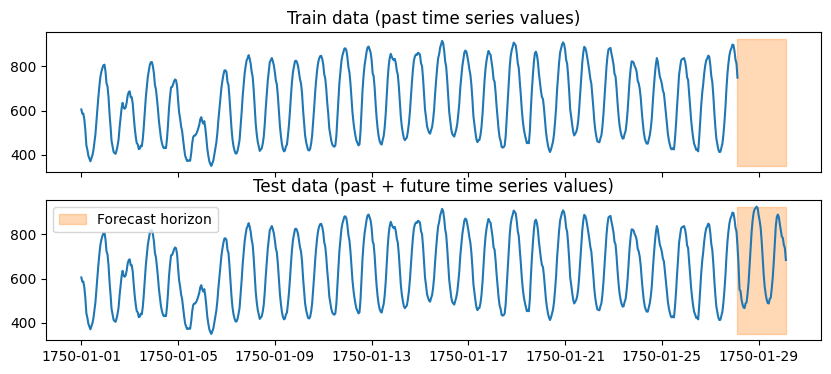

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

item_id = "H1"
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=[10, 4], sharex=True)
train_ts = train_data.loc[item_id]
test_ts = test_data.loc[item_id]
ax1.set_title("Train data (past time series values)")
ax1.plot(train_ts)
ax2.set_title("Test data (past + future time series values)")
ax2.plot(test_ts)
for ax in (ax1, ax2):
    ax.fill_between(np.array([train_ts.index[-1], test_ts.index[-1]]), test_ts.min(), test_ts.max(), color="C1", alpha=0.3, label="Forecast horizon")
plt.legend()
plt.show()